## David Zagaceta Homework 4

## <center> 2 suspended mass problem </center>

## Homework 4 problem is at the bottom

First we define the functions and symbols for our symbolic manipulation

In [1]:
from sympy import *
from sympy.plotting import plot3d
x1, x2, x3, x4, x5, x6, x7, x8, x9 = symbols('x1, x2, x3, x4, x5, x6, x7, x8, x9')

In [2]:
f1 = 3*x4 + 4*x5 + 4*x6 - 8
f2 = 3*x1 + 4*x2 - 4*x3
f3 = x7*x1 - x8*x2 - 10
f4 = x7*x4 -x8*x5
f5 = x8*x2 + x9*x3 - 20
f6 = x8*x5 -x9*x6
f7 = x1**2 + x4**2 - 1
f8 = x2**2 + x5**2 - 1
f9 = x3**2 + x6**2 - 1

x = [x1,x2,x3,x4,x5,x6,x7,x8,x9]
F = Matrix([[f1],[f2],[f3],[f4],[f5],[f6],[f7],[f8],[f9]])
J = Matrix([[0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0]])

Here we compute the Jacobian matrix of our function vector to use to compute our delta x vector.

In [3]:
for i in range(9):
    for j in range(9):
        J[i,j] = diff(F[i],x[j])

Here we turn our function vector and Jacobian matrix into functions f and j with inputs x<sub>1</sub>, x<sub>2</sub>,..., x<sub>9</sub>.

In [4]:
f = lambdify([x1,x2,x3,x4,x5,x6,x7,x8,x9],F)
j = lambdify([x1,x2,x3,x4,x5,x6,x7,x8,x9],J)

Here we define our function.  What we do here is we minimize the norm of the residual vector F_value to zero.  We input the functions along with inital values for the x value along with our acceptable resolution epsilon.  Using the Jacobian at x and the function vector at x we can solve for dx using row operations within the np.linalg.solve function.  The norm is calculated using the np.linalg.norm command.  Once the norm is less than our acceptable resolution the function terminates.  The function will also terminate and print 'failed' if the iterations exceed 1000.

In [5]:
def Newton_system(F, J, x1, x2, x3, x4, x5, x6, x7, x8, x9, eps):
    '''newtons method for a system of multivariable non linear equations'''
    import numpy as np
    F_value = F(x1,x2,x3,x4,x5,x6,x7,x8,x9).astype(np.float64)
    F_norm = np.linalg.norm(F_value)
    counter = 0
    while abs(F_norm) > eps and counter < 1000:
        J_value = J(x1,x2,x3,x4,x5,x6,x7,x8,x9).astype(np.float64)
        delta = np.linalg.solve(J_value,-F_value)
        x1 = float(x1 + delta[0])
        x2 = float(x2 + delta[1])
        x3 = float(x3 + delta[2])
        x4 = float(x4 + delta[3])
        x5 = float(x5 + delta[4])
        x6 = float(x6 + delta[5])
        x7 = float(x7 + delta[6])
        x8 = float(x8 + delta[7])
        x9 = float(x9 + delta[8])
        F_value = F(x1,x2,x3,x4,x5,x6,x7,x8,x9).astype(np.float64)
        F_norm = np.linalg.norm(F_value)
        counter += 1
    if abs(F_norm) > eps:
        return 'failed'
    #print('it took ',counter,' iterations to find the zero')
    return x1,x2,x3,x4,x5,x6,x7,x8,x9

In [6]:
Newton_system(f,j,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0, 10**(-14))


(0.7610026921018715,
 0.2649538102807026,
 0.8357058293571064,
 0.6487487207029421,
 0.9642611048972873,
 0.5491773545755061,
 17.160209784607293,
 11.545279684327758,
 20.271528044639112)

## Checking The Accuracy

In [7]:
x1,x2,x3,x4,x5,x6,x7,x8,x9 = Newton_system(f,j,1,1,1,1,1,1,1,1,1, 10**(-14))

In [8]:
f(x1,x2,x3,x4,x5,x6,x7,x8,x9)

array([[  0.00000000e+00],
       [ -2.22044605e-16],
       [  8.88178420e-16],
       [  1.77635684e-15],
       [ -3.55271368e-15],
       [ -1.77635684e-15],
       [ -1.11022302e-16],
       [ -1.11022302e-16],
       [  1.11022302e-16]])

In [9]:
%timeit Newton_system(f,j,1,1,1,1,1,1,1,1,1, 10**(-14))

597 µs ± 24.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


## Homework 4 problem

Solve the system:

$ x_1^2 + x_1x_2 = 10 $

$x_2+3x_1x_2^2 = 57$


using Newton-Raphson method.

In [10]:
x1,x2,x3 = symbols('x1, x2, x3')

In [11]:
equation_1 = x1**2+x1*x2-10
equation_2 = x2+3*x1*x2**2-57

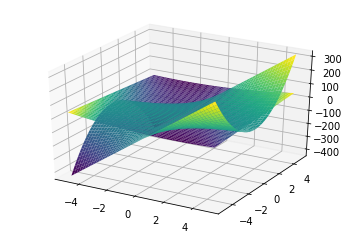

In [13]:
plot3d(equation_1,equation_2,(x1,-5,5),(x2,-5,5))

In [14]:
x = [x1,x2]
F = Matrix([[equation_1],[equation_2]])
J = Matrix([[0,0],[0,0]])

In [15]:
for i in range(len(x)):
    for j in range(len(x)):
        J[i,j] = diff(F[i],x[j])

In [16]:
f = lambdify([x1,x2],F)
j = lambdify([x1,x2],J)

In [17]:
def newton(F,J,x1,x2,eps):
    import numpy as np
    F_value = F(x1,x2).astype(np.float64)
    F_norm = np.linalg.norm(F_value)
    counter = 0
    while abs(F_norm) > eps and counter < 1000:
        J_value = J(x1,x2).astype(np.float64)
        delta = np.linalg.solve(J_value,-F_value)
        x1 = float(x1 + delta[0])
        x2 = float(x2 + delta[1])
        F_value = F(x1,x2).astype(np.float64)
        F_norm = np.linalg.norm(F_value)
        counter += 1
    if abs(F_norm) > eps:
        return 'failed'
    #print('it took ',counter,' iterations to find the zero')
    return x1,x2

In [18]:
x_1, x_2 = newton(f,j,1,1,10e-14)

In [19]:
f(x_1,x_2)

array([[ 0.],
       [ 0.]])

In [20]:
print(x_1,x_2)

2.0 3.0
